# Databases

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Libraries

In [ ]:
import glob
import os
import zipfile
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

/var/folders/mn/j0njpy6d2bq9_w2n1s6tt2gh0000gn/T/ipykernel_12649/883612356.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# data_path = '/content/drive/MyDrive/TFG-VQA/data/bases de datos.zip'
# # Extract data
# with zipfile.ZipFile(data_path, 'r') as zip_ref:
#    zip_ref.extractall('/content/data')

In [ ]:
path = '/content/data/bases de datos/ISIC_2016'

In [ ]:
# Define the file extensions to search for
extensions = ['*.jpg', '*.png', '*.mat']

# Initialize a dictionary to store the file paths
file_paths = {}

# Define the paths for different file types
idx_path = os.path.join(path, 'idx')
images_path = os.path.join(path, 'images')
masks_path = os.path.join(path, 'masks')

training_images_path = os.path.join(images_path, 'ISBI2016_ISIC_Part3_Training_Data_orig')
test_images_path = os.path.join(images_path, 'ISBI2016_ISIC_Part1_Test_Data_orig')

mask_folders = ['ISBI2016_ISIC_Part1_Test_Data_orig',
                'ISBI2016_ISIC_Part3_Training_Data_orig',
                'ISBI2016_ISIC_Part3B_Test_Data_orig']

In [ ]:
# Find all the files with the specified extensions in idx folder
for extension in extensions:
    pattern = os.path.join(idx_path, '*' + extension)
    files = glob.glob(pattern)
    if files:
        file_paths[extension] = files[0]

In [ ]:
# Find all the image files in the training folder
for extension in extensions:
    files = glob.glob(os.path.join(training_images_path, extension))
    if files:
        file_paths[extension] = files[0]

In [ ]:
file_paths

{'*.mat': '/content/data/bases de datos/ISIC_2016/idx/ch_cases.mat',
 '*.jpg': '/content/data/bases de datos/ISIC_2016/images/ISBI2016_ISIC_Part3_Training_Data_orig/ISIC_0005620.jpg'}

In [ ]:
# Find all the image files in the test folder
for extension in extensions:
    files = glob.glob(os.path.join(test_images_path, extension))
    if files:
        file_paths[extension] = files[0]

In [ ]:
# Find all the mask files in the subfolders of masks folder
for mask_folder in mask_folders:
    mask_folder_path = os.path.join(masks_path, mask_folder)
    for extension in extensions:
        files = glob.glob(os.path.join(mask_folder_path, extension))
        if files:
            file_paths[extension] = files[0]

In [ ]:
file_paths

{'*.mat': '/content/data/bases de datos/ISIC_2016/masks/ISBI2016_ISIC_Part1_Test_Data_orig/ISIC_0011213.mat',
 '*.jpg': '/content/data/bases de datos/ISIC_2016/images/ISBI2016_ISIC_Part1_Test_Data_orig/ISIC_0000172.jpg',
 '*.png': '/content/data/bases de datos/ISIC_2016/masks/ISBI2016_ISIC_Part3B_Test_Data_orig/ISIC_0010552_Segmentation.png'}

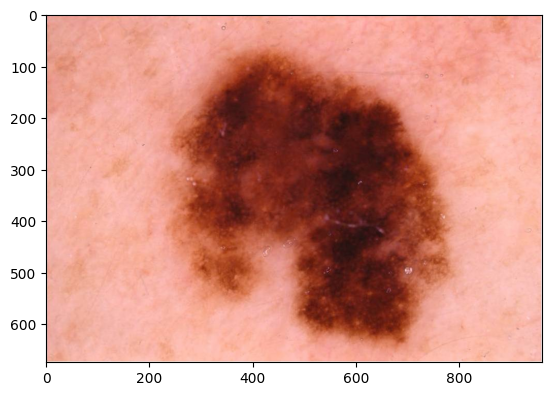

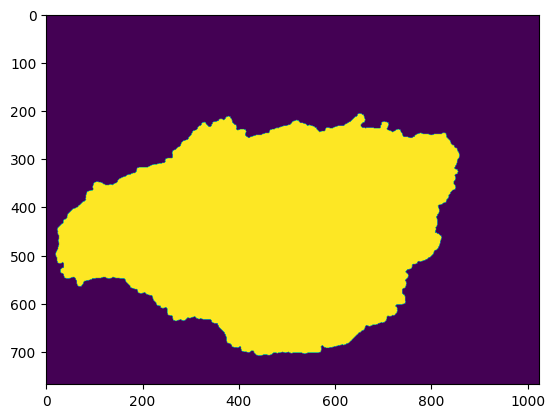

In [ ]:
for extension, file_path in file_paths.items():
    if extension == '*.mat':
        # Load the .mat file
        data = scipy.io.loadmat(file_path)
    else:
        # Load the image file
        image = plt.imread(file_path)
        # Display the image
        plt.imshow(image)
        plt.show()